<a href="https://colab.research.google.com/github/baukesh/sign-language-mnist/blob/main/Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sign Language MNIST

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download datamunge/sign-language-mnist

 78% 49.0M/62.6M [00:00<00:00, 63.8MB/s]
100% 62.6M/62.6M [00:00<00:00, 116MB/s] 


In [6]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [7]:
import csv
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from os import getcwd

In [8]:
def get_data(filename):
    with open(filename) as training_file:
        file = csv.reader(training_file, delimiter=',')
        next(file, None)
        labels, images = [], []
        for row in file:
            labels.append(row[0])
            image = np.array(row[1:785])
            image = np.array(np.array_split(image, 28))
            image = image.astype(float)
            images.append(image)
        labels = np.array(labels).astype('float')
        images = np.array(images).astype('float')
    return images, labels

path_sign_mnist_train = '/content/sign_mnist_train/sign_mnist_train.csv'
path_sign_mnist_test = '/content/sign_mnist_test/sign_mnist_test.csv'

training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [9]:
training_images = np.expand_dims(training_images, axis=3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=3)# Your Code Here

train_datagen = ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = False,
    fill_mode = 'nearest')

train_datagen.fit(training_images)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

validation_datagen.fit(testing_images)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(training_labels))+1, activation='softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size = 32),
                              epochs = 10,
                              #shuffle = True,
                              steps_per_epoch = int(len(training_images)/32),
                              validation_steps = int(len(testing_images)/8),
                              validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size = 8))

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
857/857 [==============================] - 44s 15ms/step - loss: 1.1035 - accuracy: 0.6476 - val_loss: 0.2014 - val_accuracy: 0.9171
Epoch 2/10
857/857 [==============================] - 14s 16ms/step - loss: 0.2071 - accuracy: 0.9301 - val_loss: 0.0667 - val_accuracy: 0.9706
Epoch 3/10
857/857 [==============================] - 13s 15ms/step - loss: 0.1102 - accuracy: 0.9644 - val_loss: 0.0230 - val_accuracy: 0.9940
Epoch 4/10
857/857 [==============================] - 13s 15ms/step - loss: 0.0765 - accuracy: 0.9753 - val_loss: 0.0109 - val_accuracy: 0.9954
Epoch 5/10
857/857 [==============================] - 13s 16ms/step - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.0301 - val_accuracy: 0.9854
Epoch 6/10
857/857 [==============================] - 13s 15ms/step - loss: 0.0630 - accuracy: 0.9820 - val_loss: 0.0364 - val_accuracy: 0.9925
Epoch 7/10
857/857 [==============================] - 13s 15ms/step - loss: 0.0585 - accuracy: 0.9848 - val_loss: 0.0529 - val_accuracy:

[39.48563003540039, 0.9677914381027222]

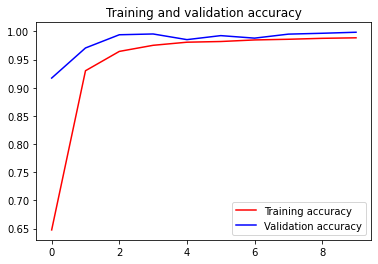

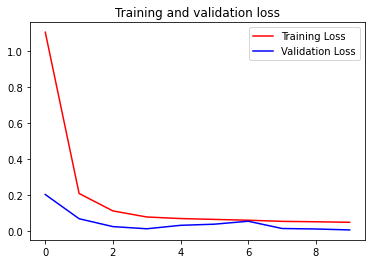

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()